In [1]:
from simulation import bootstrap_simulation, partial_state_update_blocks, CommonsSimulationConfiguration
import json
import argparse
import pandas as pd
from cadCAD.configuration import Configuration
from cadCAD.engine import ExecutionMode, ExecutionContext, Executor

In [2]:
c = CommonsSimulationConfiguration()
print(c)

<CommonsSimulationConfiguration {'days_to_80p_of_max_voting_weight': 10, 'exit_tribute': 0.35, 'hatch_tribute': 0.2, 'hatchers': 5, 'kappa': 2, 'max_proposal_request': 0.2, 'proposals': 2, 'vesting_80p_unlocked': 60}>


In [3]:
initial_conditions, simulation_parameters = bootstrap_simulation(c)

# # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # # #
# The configurations above are then packaged into a `Configuration` object
config = Configuration(initial_state=initial_conditions,
                       partial_state_update_blocks=partial_state_update_blocks,
                       sim_config=simulation_parameters
)
exec_mode = ExecutionMode()
exec_context = ExecutionContext(exec_mode.single_proc) # Do not use multi_proc, breaks ipdb.set_trace()
executor = Executor(exec_context, [config]) # Pass the configuration object inside an array
raw_result, tensor = executor.execute() # The `execute()` method returns a tuple; its first elements contains the raw results


                            __________   ____ 
          ________ __ _____/ ____/   |  / __ \
         / ___/ __` / __  / /   / /| | / / / /
        / /__/ /_/ / /_/ / /___/ ___ |/ /_/ / 
        \___/\__,_/\__,_/\____/_/  |_/_____/  
        by BlockScience
        
Execution Mode: single_proc: [<cadCAD.configuration.Configuration object at 0x7f1cd15d1c10>]
Configurations: [<cadCAD.configuration.Configuration object at 0x7f1cd15d1c10>]
ProposalFunding: Proposal 5 has 0.0 conviction, and needs 15148099.025915604 to pass
ProposalFunding: Proposal 6 has 0.0 conviction, and needs 38009496.59833454 to pass
ParticipantVoting: Participant 2 was given Proposals with corresponding affinities {5: 0.6681174439071109, 6: 0.0007192610253257126} and he decided to vote on {5: 0.6681174439071109}, distributing his tokens thusly {5: 9701166.091608604}
ProposalFunding: Participant 0 initially has staked 0 tokens on Proposal 5, which will result in 0 conviction in the next timestep
ProposalFunding: Par

In [4]:
df = pd.DataFrame(raw_result)
df_final = df[df.substep.eq(2)]


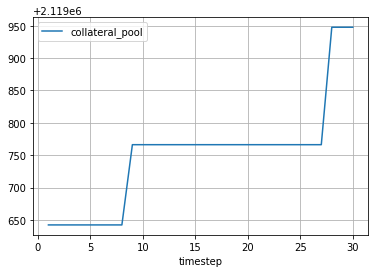

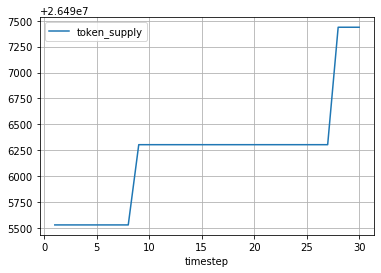

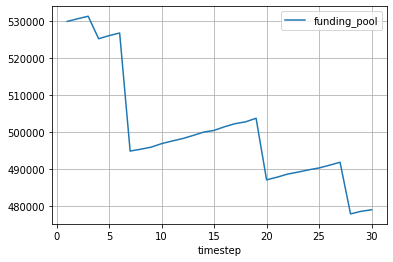

In [5]:
df_final.plot("timestep", "collateral_pool", grid=True)
df_final.plot("timestep", "token_supply", grid=True)
df_final.plot("timestep", "funding_pool", grid=True)

In [6]:
# import matplotlib.pyplot as plt
# supporters = get_edges_by_type(network, 'support')
# influencers = get_edges_by_type(network, 'influence')
# competitors = get_edges_by_type(network, 'conflict')

# nx.draw_kamada_kawai(network, nodelist = get_participants(network), edgelist=supporters)
# plt.title('Participants Social Network')